# Page-Rank

## Auftrag
**Autor:** Gregor von Flüe  

Der Page-Rank Algorithmus ist ein Verfahren, das viele verlinkte Dokumente anhand ihrer Struktur gewichtet und bewertet. Dies war und ist eines der wichtigsten Konzepte, wie Google alle indizierten Webseiten bewertet. Der Algorithmus wurde 1998 von Larry Page das erste Mal vorgestellt und patentiert. Er beschrieb eine Methode, wie jede Seite im World Wide Web eine Gewichtung zugewiesen wird, abhänging davon, wie viele andere Seiten auf diese Seite verweisen. In dieser Semesterarbeit wird zuerst die Theorie und die mathematische Grundlagen hinter diesem Algorithmus erläutert und danach an einem Anwendungsbeispiel aufgezeigt.

### Umgebung
Damit die Snippets funktionieren, müssen die folgenden Python-Module installiert sein.

* NumPy [1]
* Matplotlib [2]
* NetworkX [3]
* PrettyTable [4]

In [1]:
# pip install numpy

In [2]:
# pip install matplotlib

In [3]:
# pip install networkx

In [4]:
# pip install prettytable

## Theorie
In diesem Kapitel wird der theoretische Teil aufgeführt, welcher für die Anwendungspeispiele relevant ist.

### Eigenwerte und Eigenvektoren
Der Page-Rank Algorithmus basiert auf dem Konzept von Eigenwerten und Eigenvektoren. Hinter den Eigenwerten und Egenvektoren steht die Eigenvektorgleichung, die wie folgt lautet:

$$A\vec{x}=\lambda\vec{x}$$

Wenn nun einen Vektor $\vec{x}$ existiert, welcher nicht der Nullvektor ist, dann muss die Gleichung mit dem Eigenwert $\lambda$ gültig sein. Die Eigenvektoren und Eigenwerte einer Matrix $A$ werden über das charakteristische Polynom berechnet. Das charakteristische Polynom $\chi(A) = det(A-\lambda E_n)$ ist ein Polynom vom Grad $n$ mit höchstem Koeffizienten $(-1)^n$. Die Nullstellen des charakteristischen Polynoms sind die Eigenwerte von $A$. Die Eigenvektoren werden danach über das Lösen des jeweiligen Eigenwertes des linearen Gleichungssystem bestimmt [5].  
Geometrisch gesehen, werden Eigenvektoren durch eine Transformmatrix beeinflusst, indem sie mit ihrem entsprechenden Eigenwert nur $\lambda$ skaliert werden. Es können keine anderweitige Transformationen durchgeführt werden. Eigenwerte werden dazu verwendet, um festzustellen, ob eine Matrix $A$ diagonalisierbar ist. Denn mit diagonaliserbaren Matrizen kann viel einfacher gerechnet werden, da sich bei Diagonalmatrizen nur die Eigenwerte auf der Spur befinden.  
Mit den Eigenvektoren lässt sich eine Matrix $U$ und deren inverse $U^{-1}$ bestimmen. Bei der Matrix $U$ bestehen die einzelnen Spalten aus den berechneten linearen unabhängigen Eigenvektoren. Dadurch lässt sich nun die Diagonalmatrix $D_A$ von der Matrix $A$ wie folgt berechnen:

$$D_A=U^{-1}*A*U$$

Eine Matrix $A$ ist genau dann diagonalisierbar, wenn für jeden Eigenwert $\lambda$ von $A$ die algebraische Vielfachheit gleich seiner geometrischen Vielfachheit ist. Die algebraische Vielfachheit ist durch die Anzahl der der jeweiligen Nullstellen von $\lambda_j$ bestimmt. Die geometrische Vielfacheit ist die Anzahl an linear unabhängignen Eigenvektoren zu den Eigenwerten $\lambda$ [5].

### Markov-Kette
Die Markov-Kette beschreibt eine Zustandstransformationsmatrix, welche das Ziel besitzt die Wahrscheinlichkeit für das Eintreten zukünftiger Ereignisse anzugeben. Dies wird mit der folgenden mathematischen Formel (erweiterte Eigenwertsgleichung) beschrieben [5]:

$$\vec{x}(n+1)=A\vec{x}(n)$$

Bei der mathematischen Darstellung wird ein Vektor $\vec{s}$ verwendet um die aktuelle Wahrscheinlichkeit des Zustandes darzustellen. Mittels einer ($n \times n$)-Matrix $M$ wird die Wahrscheinlichkeit dargestellt, mit der der aktuelle Zustand $\vec{x}$ in einen anderen übergeht. Durch eine einfache Matrizenmultiplikation kann nun der aktuelle Zustand $\vec{x}(0)$ zu einem späteren Zeitpunkt berechnet werden (in der Praxis kann eine Iteration eine beliebige Zeiteinheit annehmen, welche ein Intervall einer Zustandsänderung beschreibt) [5].

$$\vec{x}(1)=M*\vec{x}(0)$$

Bei sehr vielen Iterationen wird die Berechnung des neuen Zustandes sehr aufwendig.

$$\vec{x}(n)=M*(M*(...*(M*\vec{x}(0))))$$

Allgemein lässt sich nun diese Problem vereinfachen, indem mit einer diagonalisierten Matrix $D_M$ $M^k$ berechnet wird, wobei $k$ durch die Anzahl an Iterationen gegeben ist. Dank den Eigenwerten und Eigenvektoren lässt sich eine Matrix $U$ und deren inverse $U^{-1}$ bestimmen (falls die Matrix $M$ diagonalisierbar ist) [5].

$$M^k=U*\begin{pmatrix}
\lambda_1^k & & \\
& ... & \\
& & \lambda_n^k \\
\end{pmatrix}*U^{-1}$$

Dadruch ergibt sich die vereinfachte Formel $\vec{s}(n)=M^n*\vec{s}(0)$, wenn $M$ die Matrix ist, welche einen Übergang von einem Zustand in den darauf folgenden beschreibt und $\vec{s}(0)$ der Anfangszustand ist.

### Grundprinzip Page-Rank
Das Konzept des Page-Rank's lässt sich am besten an einem Beispiel erläutern. Hierfür werden fünf Webseiten $W_1$ bis $W_5$ betrachtet, welche die folgende Adjazenzmatrix besitzen:

$$M = \begin{array}{cc} & 
\begin{array}{ccccc} W_{1} & W_{2} & W_{3} & W_{4} & W_{5} \end{array} \\
\begin{array}{c} 
W_{1} \\ 
W_{2} \\ 
W_{3} \\ 
W_{4} \\ 
W_{5} 
\end{array} & \left 
(\begin{array}{ccccc} 
0 & \quad 0 & \quad 0 & \quad 0 & \quad 0 \\ 
1 & \quad 0 & \quad 0 & \quad 1 & \quad 0 \\
1 & \quad 1 & \quad 0 & \quad 1 & \quad 1 \\
1 & \quad 0 & \quad 0 & \quad 0 & \quad 0 \\
0 & \quad 0 & \quad 0 & \quad 1 & \quad 0  
\end{array}\right) 
\end{array}$$  

Aus der Adjazenzmatrix kann ein gerichteter Graph erstellt werden, wobei jeweils ein Pfeile, in diesem Beispiel, ein Hyperlink auf die jeweilige Webseite darstellt. Somit besitzt die Webseite $W_1$ drei Hyperlinks, die auf die folgenden Webseiten $W_2$, $W_3$ und $W_4$ zeigen.  
Das Grundprinzip des Page-Rank besteht darin, dass jede Webseite ihre Stimme für die anderen Webseiten abgeben kann, indem sie die andere Webseite in einem Hyperlink erwähnt. Je mehr Webseiten auf eine andere bestimmte Webseite verweisen, desto höher wird diese Webseite geordnet. In der folgenden Abbildung zeigt sich dies durch die grösse des Nodes (Webseite). Desto mehr Webseiten auf eine bestimmte Webseite zeigen, desto grösser erscheint der jeweilge Node in der Grafik [5][6].

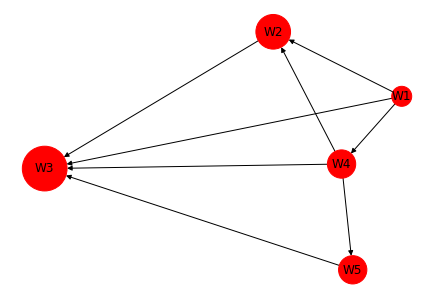

In [5]:
"""
Snippet, welches ein gerichteten Graph anhand der Adjenzmatrix G generiert.
"""


import networkx as nx 


G = nx.DiGraph()
G.add_edges_from([
    ('W1', 'W2'), ('W1', 'W3'), ('W1', 'W4'), 
    ('W2', 'W3'), 
    ('W4', 'W2'), ('W4', 'W3'), ('W4', 'W5'),
    ('W5', 'W3')
])

d = dict(G.in_degree)
nx.draw(G, node_size=[(n + 1) * 400 for n in d.values()], with_labels=True, node_color='r')

Wird diese Situation nun in eine Gleichung zur Berechnung des Gewichtes einer bestimmten Seite umgeformt, so ergibt 
sich die folgende Gleichung:

$$w_i=\sum_{j=1}^{n}M_{ji}$$

Jedoch wäre dieses Verhalten sehr einfach zu manipulieren, indem andere Webseiten erstellt werden, welche nur den Zweck haben, auf die Webseite zu referenzieren, bei der man eine gute Bewertung möchte. Um diesen Fehler zu beheben, wird jeder Seite eine Gesamtbewertung von Eins gegeben, die sie gleichmässig auf alle ausgehenden Links verteilt.

$$w_i=\sum_{j=1}^{n}\frac{M_{ji}}{n_j}$$

Der Wert $n_j$ repräsentiert die Links auf der Seite $j$. Auf Seiten mit tausenden von Links ist ein Hyperlink weniger wert als ein Hyperlink von Webseiten mit unter hundert Links. Nun besteht noch die Möglichkeit mehrere Webseiten mit nur einem Hyperlink zu erstellen, welche wiederum alle auf die eine Webseite zeigen, welche eine gute Bewertung erhalten soll. Um dieses Problem zu minimieren, wird die Gleichung mit dem Gewicht der Ausgabewebseite selbst erweitert.

$$w_i=\sum_{j=1}^{n}\frac{M_{ji}}{n_j}*w_j$$

Diese Änderung bedeutet, je beliebter eine Webseite ist, desto höher ist der Wert der Stimme, die diese Webseite an anderen Webseiten gibt. Jedoch erzeugt diese Formel eine zirkuläre Abhängigkeit, weil das Gewicht $w_i$ von einem anderen Gewicht $w_j$ berechnet wird und das Gewicht $w_j$ selbst wiederum von einem anderen Gewicht [5].  

Da sich das Gewicht der Webseiten nach einer gewissen Anzahl von Iterationen stabilisiert und somit nicht mehr verändert, spielt insofern die Gewichtung zu Beginn keine grosse Rolle, insofern alle Seite die gleiche Startgewichtung erhalten. Somit beginnt jede Webseite mit dem Anfangsgewicht von Eins und wird dann in einer Markov-Kette entwicklet, um das effektive Gewicht iterativ zu entwickeln. Somit ist der Ausgangszustand wie folgt definiert:

$$A\vec{w}=\lambda \vec{w}, \lambda=1$$

Nun können die entsprechenden Eigenvektoren zum Eigenwert $\lambda=1$ berechnet und danach das lineare Gelichungssystem aufgelöst werden, wobei dies nicht so einfach ist. Denn in der Realität gibt es fast unabzählbar viele Webseiten. Das bedeutet, dass ein Computersystem von heute diese Aufgabe nicht in einer absehbaren Zeit lösen beziehungsweise berechnen kann. Stattdessen werden Approximationen durchgeführt für die Iterationen, welche mit der Markov-Kette erzeugt werden [6].  

# Anwendung
Bevor die oben aufgeführte Theorie an der Adjazenzmatrix $M$ durchgeführt werden kann, werden die jeweiligen Gewichtungen der einzelnen Hyperlinks berechnet.  

$$M = \begin{array}{cc} & 
\begin{array}{ccccc} W_{1} & W_{2} & W_{3} & W_{4} & W_{5} \end{array} \\
\begin{array}{c} 
W_{1} \\ 
W_{2} \\ 
W_{3} \\ 
W_{4} \\ 
W_{5} 
\end{array} & 
\left (
\begin{array}{ccccc} 
0 & \quad 0 & \quad 0 & \quad 0 & \quad 0 \\ 
1 & \quad 0 & \quad 0 & \quad 1 & \quad 0 \\
1 & \quad 1 & \quad 0 & \quad 1 & \quad 1 \\
1 & \quad 0 & \quad 0 & \quad 0 & \quad 0 \\
0 & \quad 0 & \quad 0 & \quad 1 & \quad 0  
\end{array}
\right) 
\end{array}
= 
\left 
(\begin{array}{ccccc} 
0 & \quad 0 & \quad 0 & \quad 0 & \quad 0 \\ 
\frac{1}{3} & \quad 0 & \quad 0 & \quad \frac{1}{3} & \quad 0 \\
\frac{1}{3} & \quad 1 & \quad 0 & \quad \frac{1}{3} & \quad 1 \\
\frac{1}{3} & \quad 0 & \quad 0 & \quad 0 & \quad 0 \\
0 & \quad 0 & \quad 0 & \quad \frac{1}{3} & \quad 0  
\end{array}
\right)$$

Werden die fünf Iterationen mit dem Initialvektor $\vec{w}(0)$ berechnet, gibt es am Ende keine Gewichtungen mehr. Der $\vec{w}(5)$ entspricht dem Nullvektor. Dies liegt daran, dass der Knoten $W_3$ eine Art Sackgasse markiert. Wenn an allen Hyperlinks folgt wird, enden diese früher oder später immer bei dem Knoten $W_3$ und dieser zeigt auf keine anderen Knoten mehr. Das Gleiche würde passieren, wenn zwei Knoten ausschliesslich miteinander verbunden wären. 

$$\vec{w}(5)=M^5*\vec{w}(0)=
\left 
(\begin{array}{ccccc} 
0 & \quad 0 & \quad 0 & \quad 0 & \quad 0 \\ 
\frac{1}{3} & \quad 0 & \quad 0 & \quad \frac{1}{3} & \quad 0 \\
\frac{1}{3} & \quad 1 & \quad 0 & \quad \frac{1}{3} & \quad 1 \\
\frac{1}{3} & \quad 0 & \quad 0 & \quad 0 & \quad 0 \\
0 & \quad 0 & \quad 0 & \quad \frac{1}{3} & \quad 0  
\end{array}
\right)^5*
\left 
(\begin{array}{ccccc} 
1 \\ 
1 \\
1 \\
1 \\
1 
\end{array}
\right) 
= 
\left 
(\begin{array}{ccccc} 
0 \\ 
0 \\
0 \\
0 \\
0 
\end{array}
\right)$$

Um dies zu umgehen, wird ein Dämpfungsfaktor in die Gleichung der einzelnen Iterationen integriert [5]:

$$w_i=\frac{1-d}{n}+d*\sum_{j=1}^{n}\frac{M_{ji}}{n_j}*w_j$$

Der Dämpfungsfaktor besitzt normalerweise den Wert $d=0.85$, verringert das Gewicht der eingehenden Verbindungen etwas. Zudem addiert er eine konstanten Wert von $\frac{1-d}{n}$ mit jeder Iterationen. Dies garantiert, dass es immer ein kleines Gewicht gibt, damit das System nicht bei einem Nullvektor landet [5].  

$$\vec{w}(k)=1-d\sum_{j=0}^{k-1}d^jM^j
\left 
(\begin{array}{ccccc} 
1 \\ 
1 \\
1 \\
1 \\
1 
\end{array}
\right)
+d^kM^k\vec{w}(0)$$

Bei zunehmendem $k$ findet sich das Gleichgewicht ein und der Eigenvektor lautet für dieses Beispiel:

$$\left 
(\begin{array}{ccccc} 
0.1500 \\ 
0.2470 \\
0.6309 \\
0.1925 \\
0.2045
\end{array}
\right)$$

Die Webseite $W_3$ besitzt den höchsten Page-Rank, da alle anderen Seiten auf diese verweisen und $W_1$ den tiefsten Page-Rank, da keine Hyperlinks auf diese Webseite verweisen [6].

## Implementierung
Zu beginn wird ein Datenset definiert, welches die Webseiten mit den Hyperlinks enthält. Dieses Datenset wird danach über den Konstruktor der Klasse `PageRank` übergeben. Die Klasse `PageRank` besitzt eine Methode `berechne` welche zwei Übergabeparameter $k$ und $d$ mit den Standardwerten $k=100$ und $d=0.85$ besitzt. Zudem gibt die Methode das Resultat in Form einer Tabelle aus.  
Damit die Berechnung aus dem zuvor aufgeführten Kapitel durchgeführt werden kann, muss aus dem Datenset eine Adjazenzmatrix erstellt werden. Dies erfolgt über die interne Methode `erstelle_adjazenmatrix`. Diese Methode besitzt zwei Schleifen. Die erste Schleife iteriert über die Zielseiten. Um dabei eine Zeile zu füllen, iteriert eine zweite Schleife über die Quellseiten, aus denen die Hyperlinks enstehen. Enthalten die Quellseiten einen Hyperlink auf die aktuelle Zielseite, so wird eine Teilabstimmungswert berechnet.

In [6]:
import numpy as np
from prettytable import PrettyTable


class PageRank:
    """
    Enthält die Logik für die Berechnung des Page-Ranks.
    """

    def __init__(self, webseiten):
        """
        Konstruktor für die Erstellung eines PageRank-Objekts.
        @param: self: Objektreferenz.
        @param: webseiten: Datenset, welches Webseiten mit Hyperlinks represäntiert.
                           <ID>: {
                               'name': <NAME>,
                               'ref': (<ID>, ...)
                           }, ...
        """

        self.webseiten = webseiten
        self.anzahl_webseiten = len(self.webseiten.keys())

    def __erstelle_initialer_vektor(self):
        """
        Erstellt einen initalen Vektor, welcher nur Einsen enthält mit der Dimension von Anzahl Webseiten.
        @param: self: Objektreferenz.
        @return: Initiale Vektor.
        """

        return np.matrix([[1] for _ in range(0, self.anzahl_webseiten)])

    def __erstelle_adjazenmatrix(self):
        """
        Erstellt die Adjazenmatrix für die Webseiten.
        @param: self: Objektreferenz.
        @return: Adjazenmatrix zu den Webseiten.
        """

        matrix_rows = list()
        for zielwebseite_index, (zielwebseite_id, zielwebseite_info) in enumerate(self.webseiten.items()):
            row = [0] * len(self.webseiten.keys())
            for quellwebseite_index, (quellwebseite_id, quellwebseite_info) in enumerate(self.webseiten.items()):
                referenzen = quellwebseite_info.get('ref', ())
                # Teilabstimmungswert berechnet.
                if zielwebseite_id in referenzen:
                    row[quellwebseite_index] = 1.0 / len(referenzen)
            matrix_rows.append(row)
        return np.matrix(matrix_rows)

    def __print(self, vektor):
        """
        Erstellt eine Tabelle für die Konsole, welche die Rangierung und der Page-Rank der Webseiten anzeigt.
        @param: self: Objektreferenz.
        @param: vektor: Page-Rank nach k-Iterationen.
        """
        
        table = PrettyTable()
        table.field_names = ["Rangierung", "Webseite", "Wert"]
        
        # Fusioniert die berechneten Page-Ranks und Webseiten zu einem Objekt und sortiert diese absteigend.
        webseite_mit_sortiertem_pagerank = sorted(zip(self.webseiten.values(), vektor.getA1()), key=lambda name: name[1], reverse=True)
        
        # Fügt die jeweiligen Resultate zur Tabelle hinzu.
        for index, (webseite, pagerank) in enumerate(webseite_mit_sortiertem_pagerank):
            table.add_row([index + 1, webseite.get('name'), pagerank])

        print(table)

    def berechne(self, k=100, d=0.85):
        """
        Führt die Berechnung des Page-Ranks durch.
        @param: self: Objektreferenz.
        @param: k: Anzahl der Iterationen.
        @param: d: Dämpungsfaktor.
        """

        M = self.__erstelle_adjazenmatrix()
        e = self.__erstelle_initialer_vektor()
        w_0 = self.__erstelle_initialer_vektor()
        
        # Berechnung von k-Iterationen
        w_k = (1 - d) * sum([d ** j * M ** j * e for j in range(0, k - 1)]) + d ** k * M ** k * w_0
        
        self.__print(w_k)

### Datenset
Datenset, welches das vorherige Beispiel repräsentiert.

In [7]:
WEBSEITEN = {
    'W1': {
        'name': 'W1',
        'ref': (
            'W2', 'W3', 'W4',
        )
    },
    'W2': {
        'name': 'W2',
        'ref': (
            'W3',
        )
    },
    'W3': {
        'name': 'W3',
    },
    'W4': {
        'name': 'W4',
        'ref': (
        'W2', 'W3', 'W5',
        )
    },
    'W5': {
        'name': 'W5',
        'ref': (
            'W3',
        )
    }
}

## Anwendungsbeispiele
Das folgende Beispiel zeigt das Resultat von dem Beispiel aus den vorherigen Kapitel. Wie schon zu erwarten war, hat die Webseite $W_3$ den höchsten Page-Rank. Da diese von allen Seiten referenziert wird und die Webseite $W_1$ den kleinsten.

In [8]:
PageRank(WEBSEITEN).berechne()

+------------+----------+---------------------+
| Rangierung | Webseite |         Wert        |
+------------+----------+---------------------+
|     1      |    W3    |  0.6308875000000002 |
|     2      |    W2    |  0.2470416666666667 |
|     3      |    W5    | 0.20454166666666665 |
|     4      |    W4    |        0.1925       |
|     5      |    W1    | 0.15000000000000002 |
+------------+----------+---------------------+


Referenzieren nun neu $W_2$ bis $W_4$ neu noch auf die Webseite $W_1$, besitzt $W_1$ das beste Ranking. Dies liegt daran, dass eine Stimme von $W_3$ mehr Gewichtung hat als eine Stimme von $W_1$. Da sich diese Seiten gegenseitig referenzieren und beide gleich viele Stimmen haben, gewinnt die Webseite $W_1$.

In [9]:
WEBSEITEN = {
    'W1': {
        'name': 'W1',
        'ref': (
            'W2', 'W3', 'W4',
        )
    },
    'W2': {
        'name': 'W2',
        'ref': (
            'W1', 'W3', 
        )
    },
    'W3': {
        'name': 'W3',
        'ref': (
            'W1',
        )
    },
    'W4': {
        'name': 'W4',
        'ref': (
            'W1', 'W2', 'W3', 'W5',
        )
    },
    'W5': {
        'name': 'W5',
        'ref': (
            'W3',
        )
    }
}

PageRank(WEBSEITEN).berechne()

+------------+----------+---------------------+
| Rangierung | Webseite |         Wert        |
+------------+----------+---------------------+
|     1      |    W1    |  1.8280236008650559 |
|     2      |    W3    |  1.4022217772965426 |
|     3      |    W2    |  0.8098772723265224 |
|     4      |    W4    |  0.6679400187266988 |
|     5      |    W5    | 0.29193725359982325 |
+------------+----------+---------------------+


## Fazit
Diese Arbeit hat mir grossen Spass gemacht, da bei dieser Arbeit der Zusammenhang von Praxis und linearer Algebra ersichtlich war. Das Anwendungsbeispiel zeigt gut auf, wie die Gewichtung der jeweiligen Stimmen Einfluss auf den Page-Rank haben.

## Literaturverzeichnis
[1] NumPy Developers. (2020). NumPy. Abgerufen am 27.11.2020 von https://numpy.org/  
[2] Matplotlib Developers. (2020). Matplotlib. Abgerufen am 27.11.2020 von https://matplotlib.org/  
[3] NetworkX Developers. (2020). NetworkX. Abgerufen am 27.11.2020 von https://networkx.org/  
[4] PrettyTable Developers. (2020). PrettyTable. Abgerufen am 27.11.2020 von https://pypi.org/project/prettytable/  
[5] G. Teschl, S. Teschl. (2014) Mathematik für Informatiker. Springer-Verlag Berlin Heidelberg.  
[6] S. Ceri, A. Bozzon, M. Brambilla, E. Della Valle, P. Fraternali, S. Quarteroni. (2013) Web Information Retrieval. Springer-Verlag Berlin Heidelberg.  